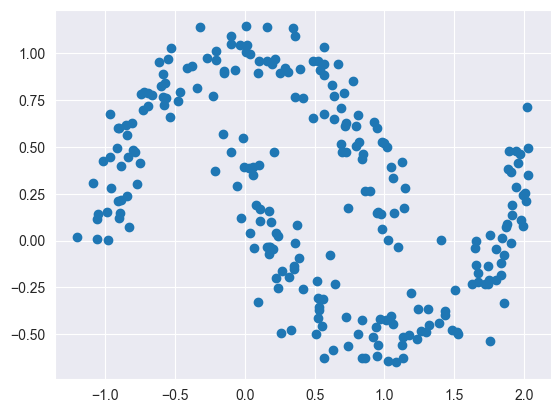

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
X, y = make_moons(n_samples=250, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])
# Feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.2)
clf.fit(X_scaled)
pred = clf.predict(X_scaled)


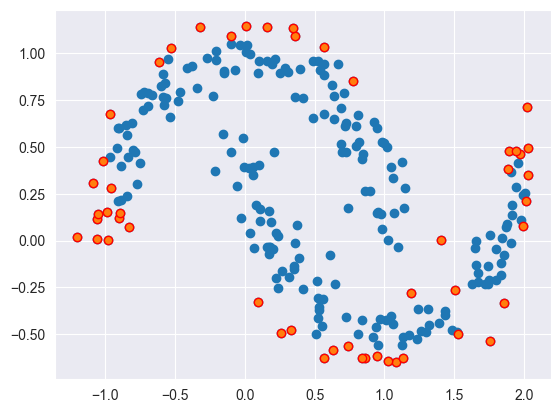

In [6]:
import numpy as np
index = np.where(pred <0)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[index,0], X[index,1], edgecolors="r")


<module 'matplotlib.pyplot' from 'C:\\Users\\LENOVO_PC\\Desktop\\DS_projects\\Regression\\Algerian_Wildfire_Analysis_and_Modeling\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

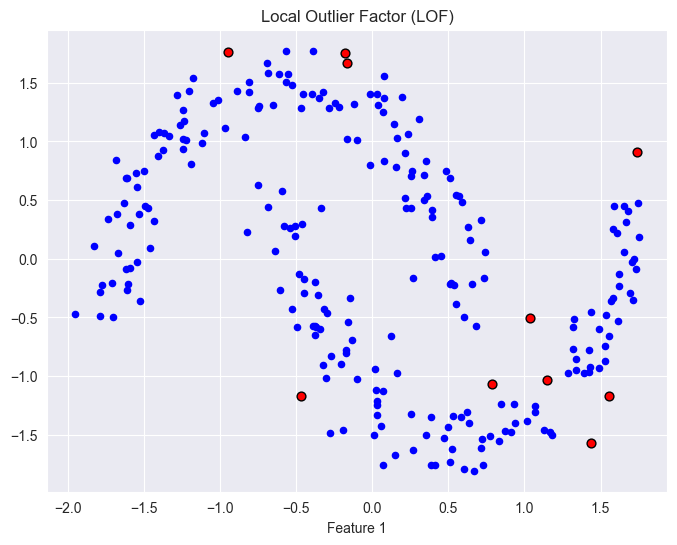

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Fit the LOF model
lof = LocalOutlierFactor(n_neighbors=5)
y_pred = lof.fit_predict(X_scaled)   # -1 = outlier, 1 = inlier
scores = lof.negative_outlier_factor_

# Scatter plot (assuming your data has 2D features for visualization)
plt.figure(figsize=(8,6))

# Plot inliers
plt.scatter(
    X_scaled[y_pred == 1, 0],
    X_scaled[y_pred == 1, 1],
    c="blue", label="Inliers", s=20
)

# Plot outliers
plt.scatter(
    X_scaled[y_pred == -1, 0],
    X_scaled[y_pred == -1, 1],
    c="red", label="Outliers", s=40, edgecolors="k"
)

plt.title("Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt